# More of Gaussian Likelihood and $\chi^{2}$. Fitting a sine function.

In [1]:
#Importing main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Making a time and data set with a sine behaviour
#These data will be the same for both methods (chi square and gaussian likelihood)
y = np.sin(np.linspace(0,10,100))
t = np.linspace(0,10,100)

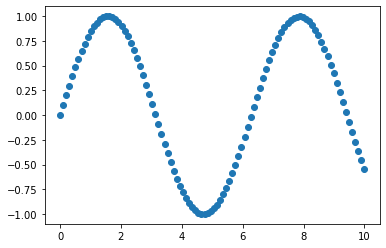

In [3]:
#Plotting
plt.plot(t,y,'o')

In [4]:
#Creating white noise to the data set with numpy.random.normal
noise = np.random.normal(loc=0, scale=0.2, size=100)
#Adding that noise to our data set
signal = y + noise

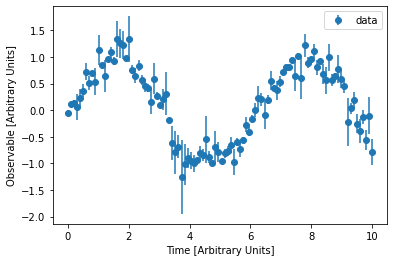

In [5]:
#Plotting the noisy data
plt.errorbar(t, signal, yerr = noise, label = 'data', fmt = 'o')
plt.xlabel('Time [Arbitrary Units]')
plt.ylabel('Observable [Arbitrary Units]')
plt.legend()
plt.show()

## 1.- Maximizing the Log of Gaussian Likelihodd.

In [6]:
#Defining a sine function
def se(t,p):
    a1 = p[0]
    a2 = p[1]
    a3 = p[2]
    a4 = p[3]
    return a1 + a2*np.sin(a3*t) + a4*np.cos(a3*t)

In [7]:
#Defining a function for the logarithmic Gaussian likelihood
def negalolik(p,t,y,noise):
    f = se(t,p)
    chidos = (y - f)**2/noise**2
    lognorm = np.log(2 * np.pi * noise**2)
    total = lognorm + chidos
    loglike = -0.5*np.sum(total)
#Since we are trying to maximize the gaussian likelihood, we have to minimize its negative.     
    return -loglike

In [8]:
#Maximizing the likelihood.
lik_model = minimize(negalolik,x0=[0,0,0,0], args=(t,y,noise))

In [9]:
print(lik_model)

      fun: -124.45174400213558
 hess_inv: array([[ 1.12276526e-05, -9.87470467e-06,  8.53464217e-07,
        -5.52224951e-06],
       [-9.87470467e-06,  1.50167780e-05,  3.25954039e-06,
        -1.85309888e-05],
       [ 8.53464217e-07,  3.25954039e-06,  6.96584547e-06,
        -2.52749928e-05],
       [-5.52224951e-06, -1.85309888e-05, -2.52749928e-05,
         1.27676169e-04]])
      jac: array([-9.53674316e-07,  0.00000000e+00,  9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 300
      nit: 34
     njev: 60
   status: 0
  success: True
        x: array([-1.20363690e-08,  9.99999978e-01,  9.99999966e-01,  1.47327869e-07])


In [10]:
print("The optimized values of our parameters are:","a1 =", lik_model.x[0],", a2 =",lik_model.x[1], ", a3 =", lik_model.x[2], "and a4 = ", lik_model.x[3])

The optimized values of our parameters are: a1 = -1.203636897599416e-08 , a2 = 0.9999999784205227 , a3 = 0.999999965608724 and a4 =  1.4732786903841983e-07


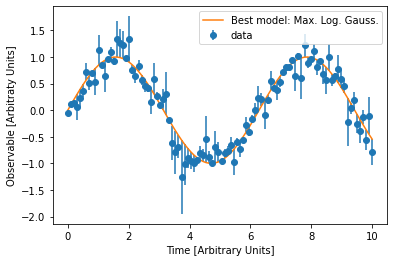

In [11]:
#Now plotting the noisy data with the best fit obtained by maximizing the log gaussian likelihood
f = se(t,lik_model.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "Best model: Max. Log. Gauss.")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

## 2.- Minimizing the $\chi^{2}$.

In [12]:
#Defining a sine function but with other set of parameters
def sen(t,para):
    b1 = para[0]
    b2 = para[1]
    b3 = para[2]
    b4 = para[3]
    return b1 + b2*np.sin(b3*t) + b4*np.cos(b3*t)

In [13]:
#Defining a function for the chi square
def jicuadro(para,t,y,noise):
    m   = sen(t,para)
    chi = 0.5*(y - m)**2/noise**2
    chi_square = np.sum(chi)
    return chi_square

In [14]:
#Minimizing the chi_square
ji_cuadro = minimize(jicuadro,x0=[0,0,0,0],args=(t,y,noise))

In [15]:
print(ji_cuadro)

      fun: 1.093346171129907e-10
 hess_inv: array([[ 1.12355948e-05, -9.84812925e-06,  8.92335414e-07,
        -5.69272070e-06],
       [-9.84812925e-06,  1.49412396e-05,  3.22520825e-06,
        -1.83451558e-05],
       [ 8.92335414e-07,  3.22520825e-06,  6.98691809e-06,
        -2.53489019e-05],
       [-5.69272070e-06, -1.83451558e-05, -2.53489019e-05,
         1.27853362e-04]])
      jac: array([-2.86526651e-07,  7.00976240e-08,  1.77163775e-06,  3.65878420e-07])
  message: 'Optimization terminated successfully.'
     nfev: 300
      nit: 34
     njev: 60
   status: 0
  success: True
        x: array([-1.20346583e-08,  9.99999978e-01,  9.99999966e-01,  1.47300423e-07])


In [16]:
print("The optimized values of our parameters are:","b1 =", ji_cuadro.x[0],", b2 =",ji_cuadro.x[1], ", b3 =", ji_cuadro.x[2], "and b4 = ", ji_cuadro.x[3])

The optimized values of our parameters are: b1 = -1.2034658348072664e-08 , b2 = 0.9999999784240878 , b3 = 0.9999999656160004 and b4 =  1.4730042328914677e-07


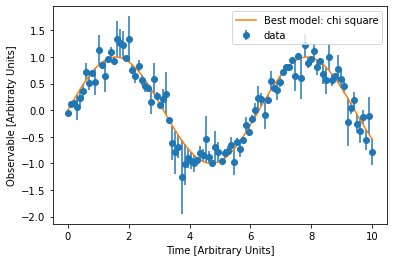

In [17]:
#Now plotting the noisy data with the best fit obtained by minimzing the chi square
m = sen(t,ji_cuadro.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,m, label = "Best model: chi square")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

## Comparing the parameters.

### When maximizing the log of the Gaussian likelihood, the mathematical model was the following:
$f = a_{1} + a_{2}\sin(a_{3}  t) + a_{4}\cos(a_{3}  t)$

### Meanwhile, when minimizing the $\chi^{2}$, the mathematical model was the same, but with other set of parameters:

$ f = b_{1} + b_{2}\sin(b_{3}t) + b_{4}\cos(b_{3}t)$

### We can see from the plots that both models created very good and pretty similar fits to the data. So, let's compare the value of each set of parameters.

In [18]:
#Assigning the optimized values to the parameters once more.

#Parameters found with Gaussian Likelihood
a1 = lik_model.x[0]
a2 = lik_model.x[1]
a3 = lik_model.x[2]
a4 = lik_model.x[3]

#Parameters found with chi square
b1 = ji_cuadro.x[0]
b2 = ji_cuadro.x[1]
b3 = ji_cuadro.x[2]
b4 = ji_cuadro.x[3]

In [19]:
#Making the substractions
d_11 = np.abs(a1 - b1)
d_22 = np.abs(a2 - b2)
d_33 = np.abs(a3 - b3)
d_44 = np.abs(a4 - b4)

print(d_11)
print(d_22)
print(d_33)
print(d_44)

1.710627921495817e-12
3.5651481766763027e-12
7.276401703393276e-12
2.7445749273066888e-11


## Making a table with those values:

| Max. log | Chi square | Difference abs(Max.log - Chi square)|
| :- | -: | :-: |
| a1 = -8.2323447380735e-09 | b1 = -1.2849661616867256e-08| 4.617316878793755e-09
| a2 = 0.9999999502685002| b2 = 0.999999936874233| 1.339426713986569e-08 
| a3 = 0.9999999913114479| b3 = 0.9999999784540929| 1.285735495848428e-08
| a4 = 4.911423674404195e-08| b4 = 7.494674805127504e-08| 2.5832511307233087e-08